<a href="https://colab.research.google.com/github/SS2803/Digit-Detection/blob/main/Digit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

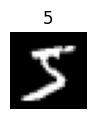

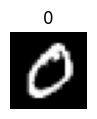

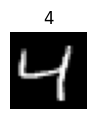

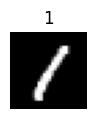

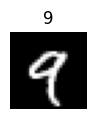

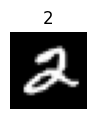

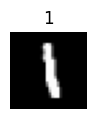

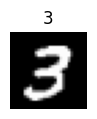

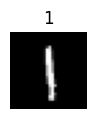

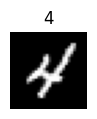

In [ ]:
import matplotlib.pyplot as plt

for  i in range(0,10):
  plt.figure(figsize=(1,1))
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.axis('off')


Reshaping of **Images**


In [ ]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)
input_shape =(28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

**Normalizing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
print('x_train shape: ',x_train.shape)
print('Number of images in x_train: ',x_train.shape[0])
print('Number of images in x_test: ',x_test.shape[0])

x_train shape:  (60000, 28, 28, 1)
Number of images in x_train:  60000
Number of images in x_test:  10000


In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0823 - accuracy: 0.9751
Epoch 2/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0548 - accuracy: 0.9833
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0416 - accuracy: 0.9859


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0498 - accuracy: 0.9844


[0.049815814942121506, 0.9843999743461609]

In [ ]:
import numpy as np
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
predictions[110:120]

array([[1.09661569e-09, 5.04674382e-08, 2.65624590e-06, 5.27190650e-06,
        3.92863346e-11, 8.27142710e-09, 2.42902076e-09, 2.51682619e-10,
        9.99991953e-01, 1.35552652e-10],
       [2.57194053e-08, 8.88346229e-03, 1.61600544e-03, 1.30932764e-04,
        1.06299204e-07, 1.12732039e-07, 1.88639188e-10, 9.89253759e-01,
        1.04772385e-04, 1.08879922e-05],
       [3.02935021e-12, 4.36731629e-09, 5.18189625e-09, 9.99997795e-01,
        5.85689049e-13, 1.88543140e-06, 3.32505515e-15, 1.11128540e-09,
        3.07881542e-09, 2.42367577e-07],
       [1.21496077e-14, 9.94585599e-13, 2.75619705e-09, 1.73163971e-06,
        5.71277923e-08, 5.69353320e-09, 1.22398065e-14, 3.91699132e-07,
        6.17590388e-08, 9.99997675e-01],
       [1.71267167e-12, 4.90445462e-09, 2.68891417e-05, 7.04190243e-05,
        6.61793322e-08, 8.35534975e-10, 1.47075311e-14, 9.99902189e-01,
        3.00776406e-07, 2.88865665e-09],
       [3.89109971e-08, 3.36110929e-07, 3.36132211e-06, 9.36470940e-07,
   

In [ ]:
print(predictions[110])

[1.0966157e-09 5.0467438e-08 2.6562459e-06 5.2719065e-06 3.9286335e-11
 8.2714271e-09 2.4290208e-09 2.5168262e-10 9.9999195e-01 1.3555265e-10]


In [ ]:
print(max(predictions[110]))

0.99999195


In [ ]:
predicted_labels = np.argmax(predictions , axis=1)

In [ ]:
print(predicted_labels[110:120])

[8 7 3 9 7 9 4 4 9 2]


In [ ]:
print(y_test[110:120])

[8 7 3 9 7 4 4 4 9 2]
